In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


# **Prediction of Cirrhosis (PS - S3E26)**

1. Data Exploration

2. EDA

3. Modelling

4. Submission

# Data Exploration

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
samp_sub = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [3]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [4]:
samp_sub.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128
3,7908,0.628084,0.034788,0.337128
4,7909,0.628084,0.034788,0.337128


## Understanding the variables

> f(x) = y

f(Stage) = columns(1-18)

Let us **drop the 'id' column** from both the train and test since it is a **non-essential**.

In [5]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)
train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [6]:
test.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


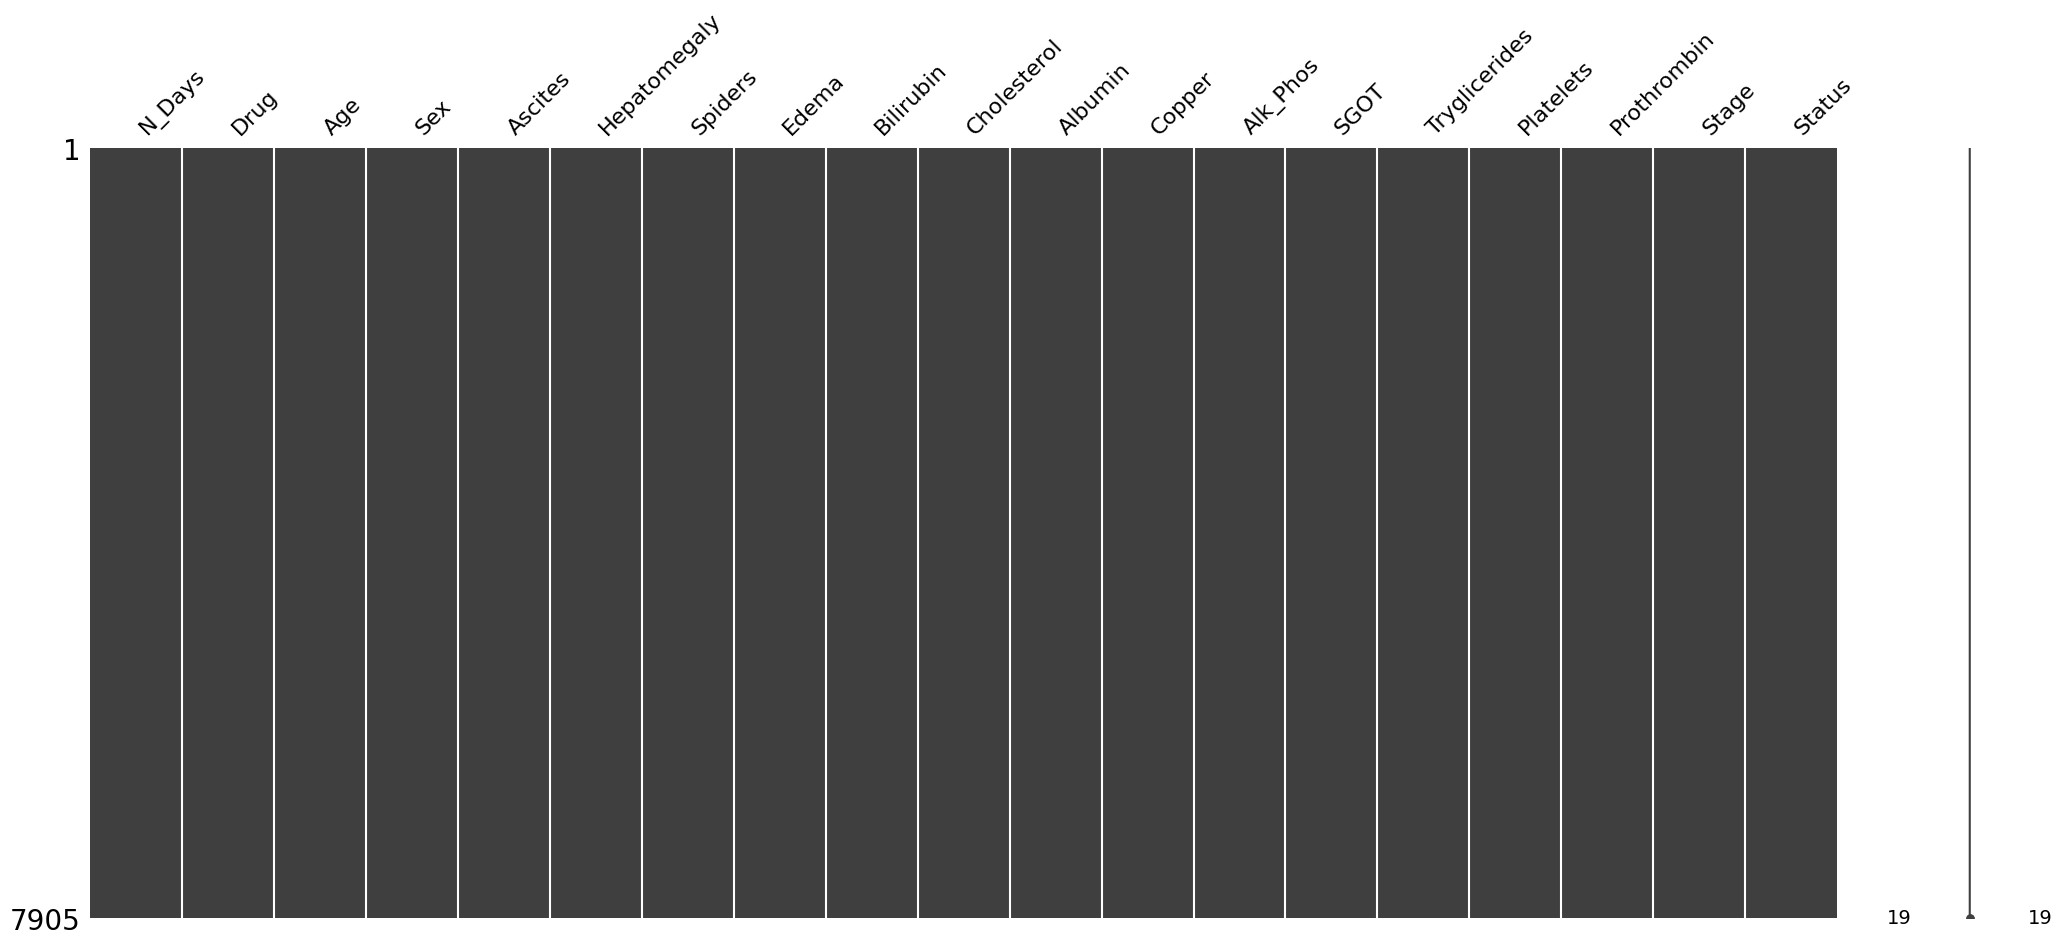

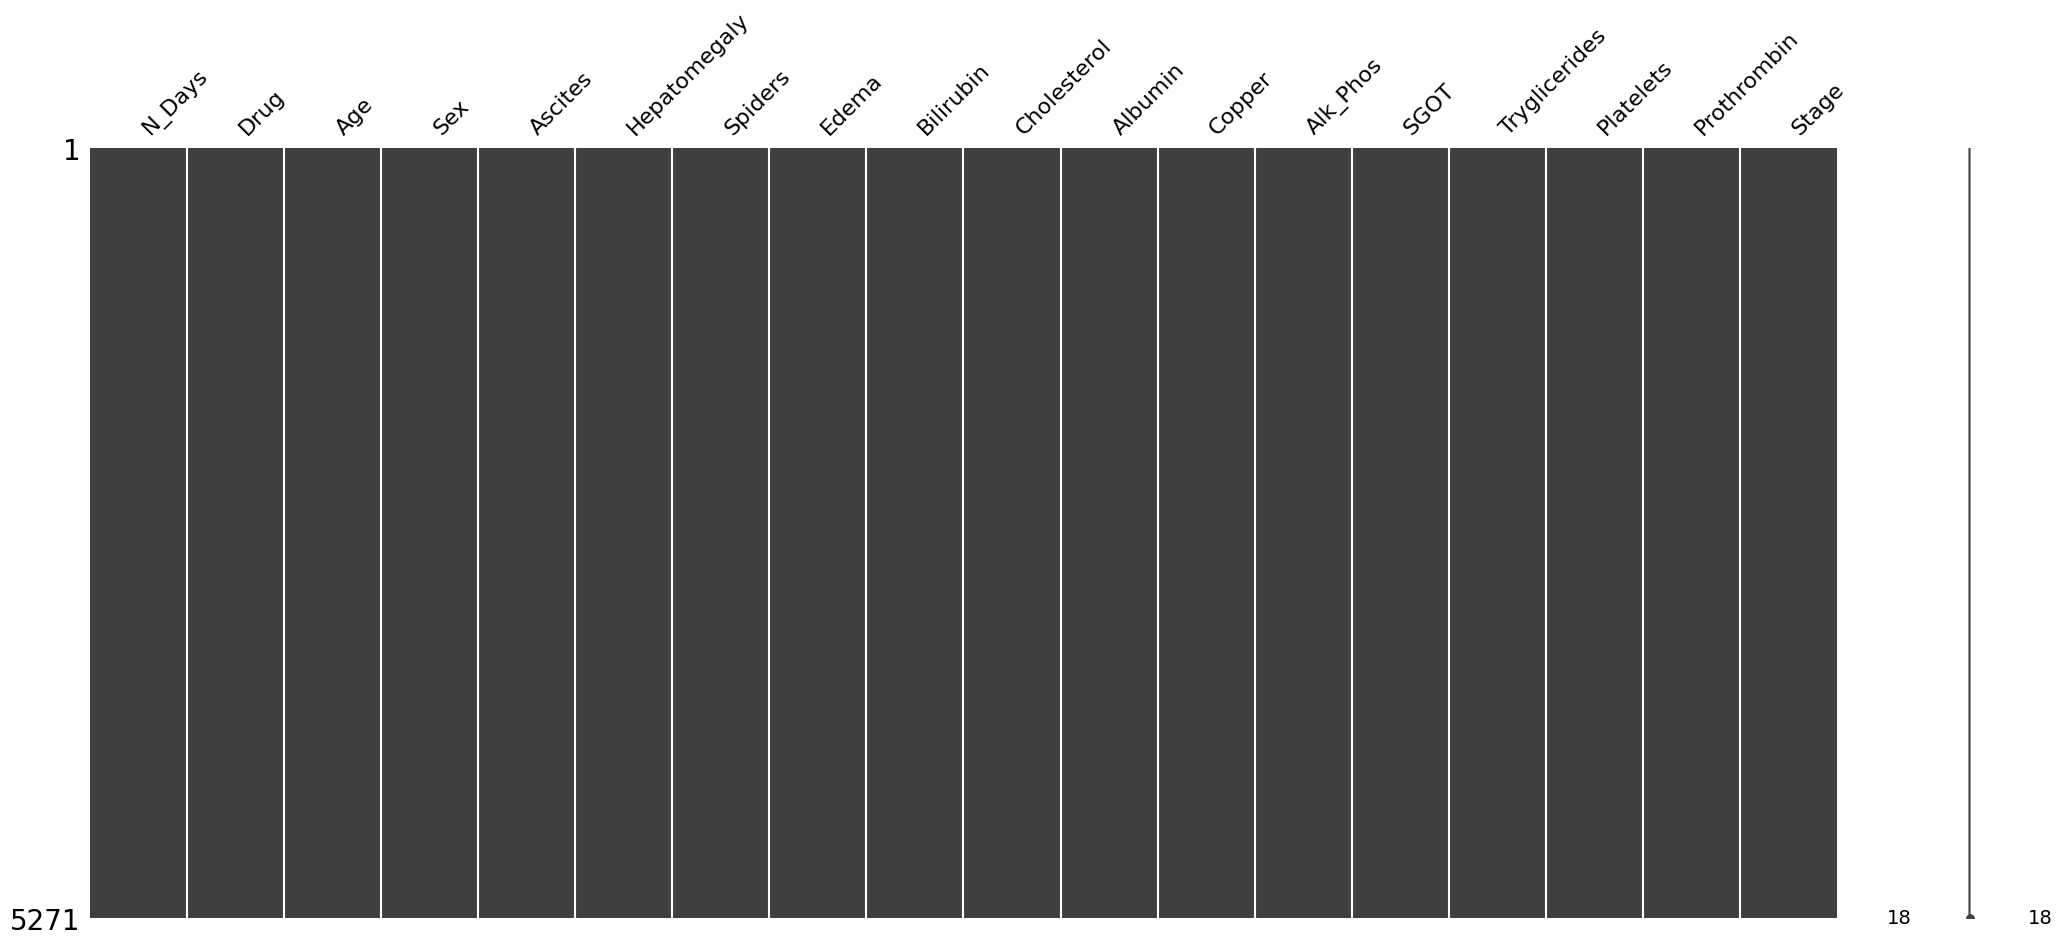

In [7]:
import missingno
import matplotlib.pyplot as plt

for i in [train, test]:
    missingno.matrix(i, sparkline=True)

In [8]:
train.isnull().mean()*100

N_Days           0.0
Drug             0.0
Age              0.0
Sex              0.0
Ascites          0.0
Hepatomegaly     0.0
Spiders          0.0
Edema            0.0
Bilirubin        0.0
Cholesterol      0.0
Albumin          0.0
Copper           0.0
Alk_Phos         0.0
SGOT             0.0
Tryglicerides    0.0
Platelets        0.0
Prothrombin      0.0
Stage            0.0
Status           0.0
dtype: float64

In [9]:
test.isnull().mean()*100

N_Days           0.0
Drug             0.0
Age              0.0
Sex              0.0
Ascites          0.0
Hepatomegaly     0.0
Spiders          0.0
Edema            0.0
Bilirubin        0.0
Cholesterol      0.0
Albumin          0.0
Copper           0.0
Alk_Phos         0.0
SGOT             0.0
Tryglicerides    0.0
Platelets        0.0
Prothrombin      0.0
Stage            0.0
dtype: float64

No null values!

#### Checking for duplicates

In [10]:
duplicates = pd.concat([train.drop('Status', axis=1), test], axis=0)
duplicates.duplicated().sum()

0

No duplicates!

# **Exploratory Data Analysis**

For creating some data visualizations, lets create a list of the column names

In [11]:
features = train.columns.tolist()
features.pop()

'Status'

In [12]:
target = train['Status']

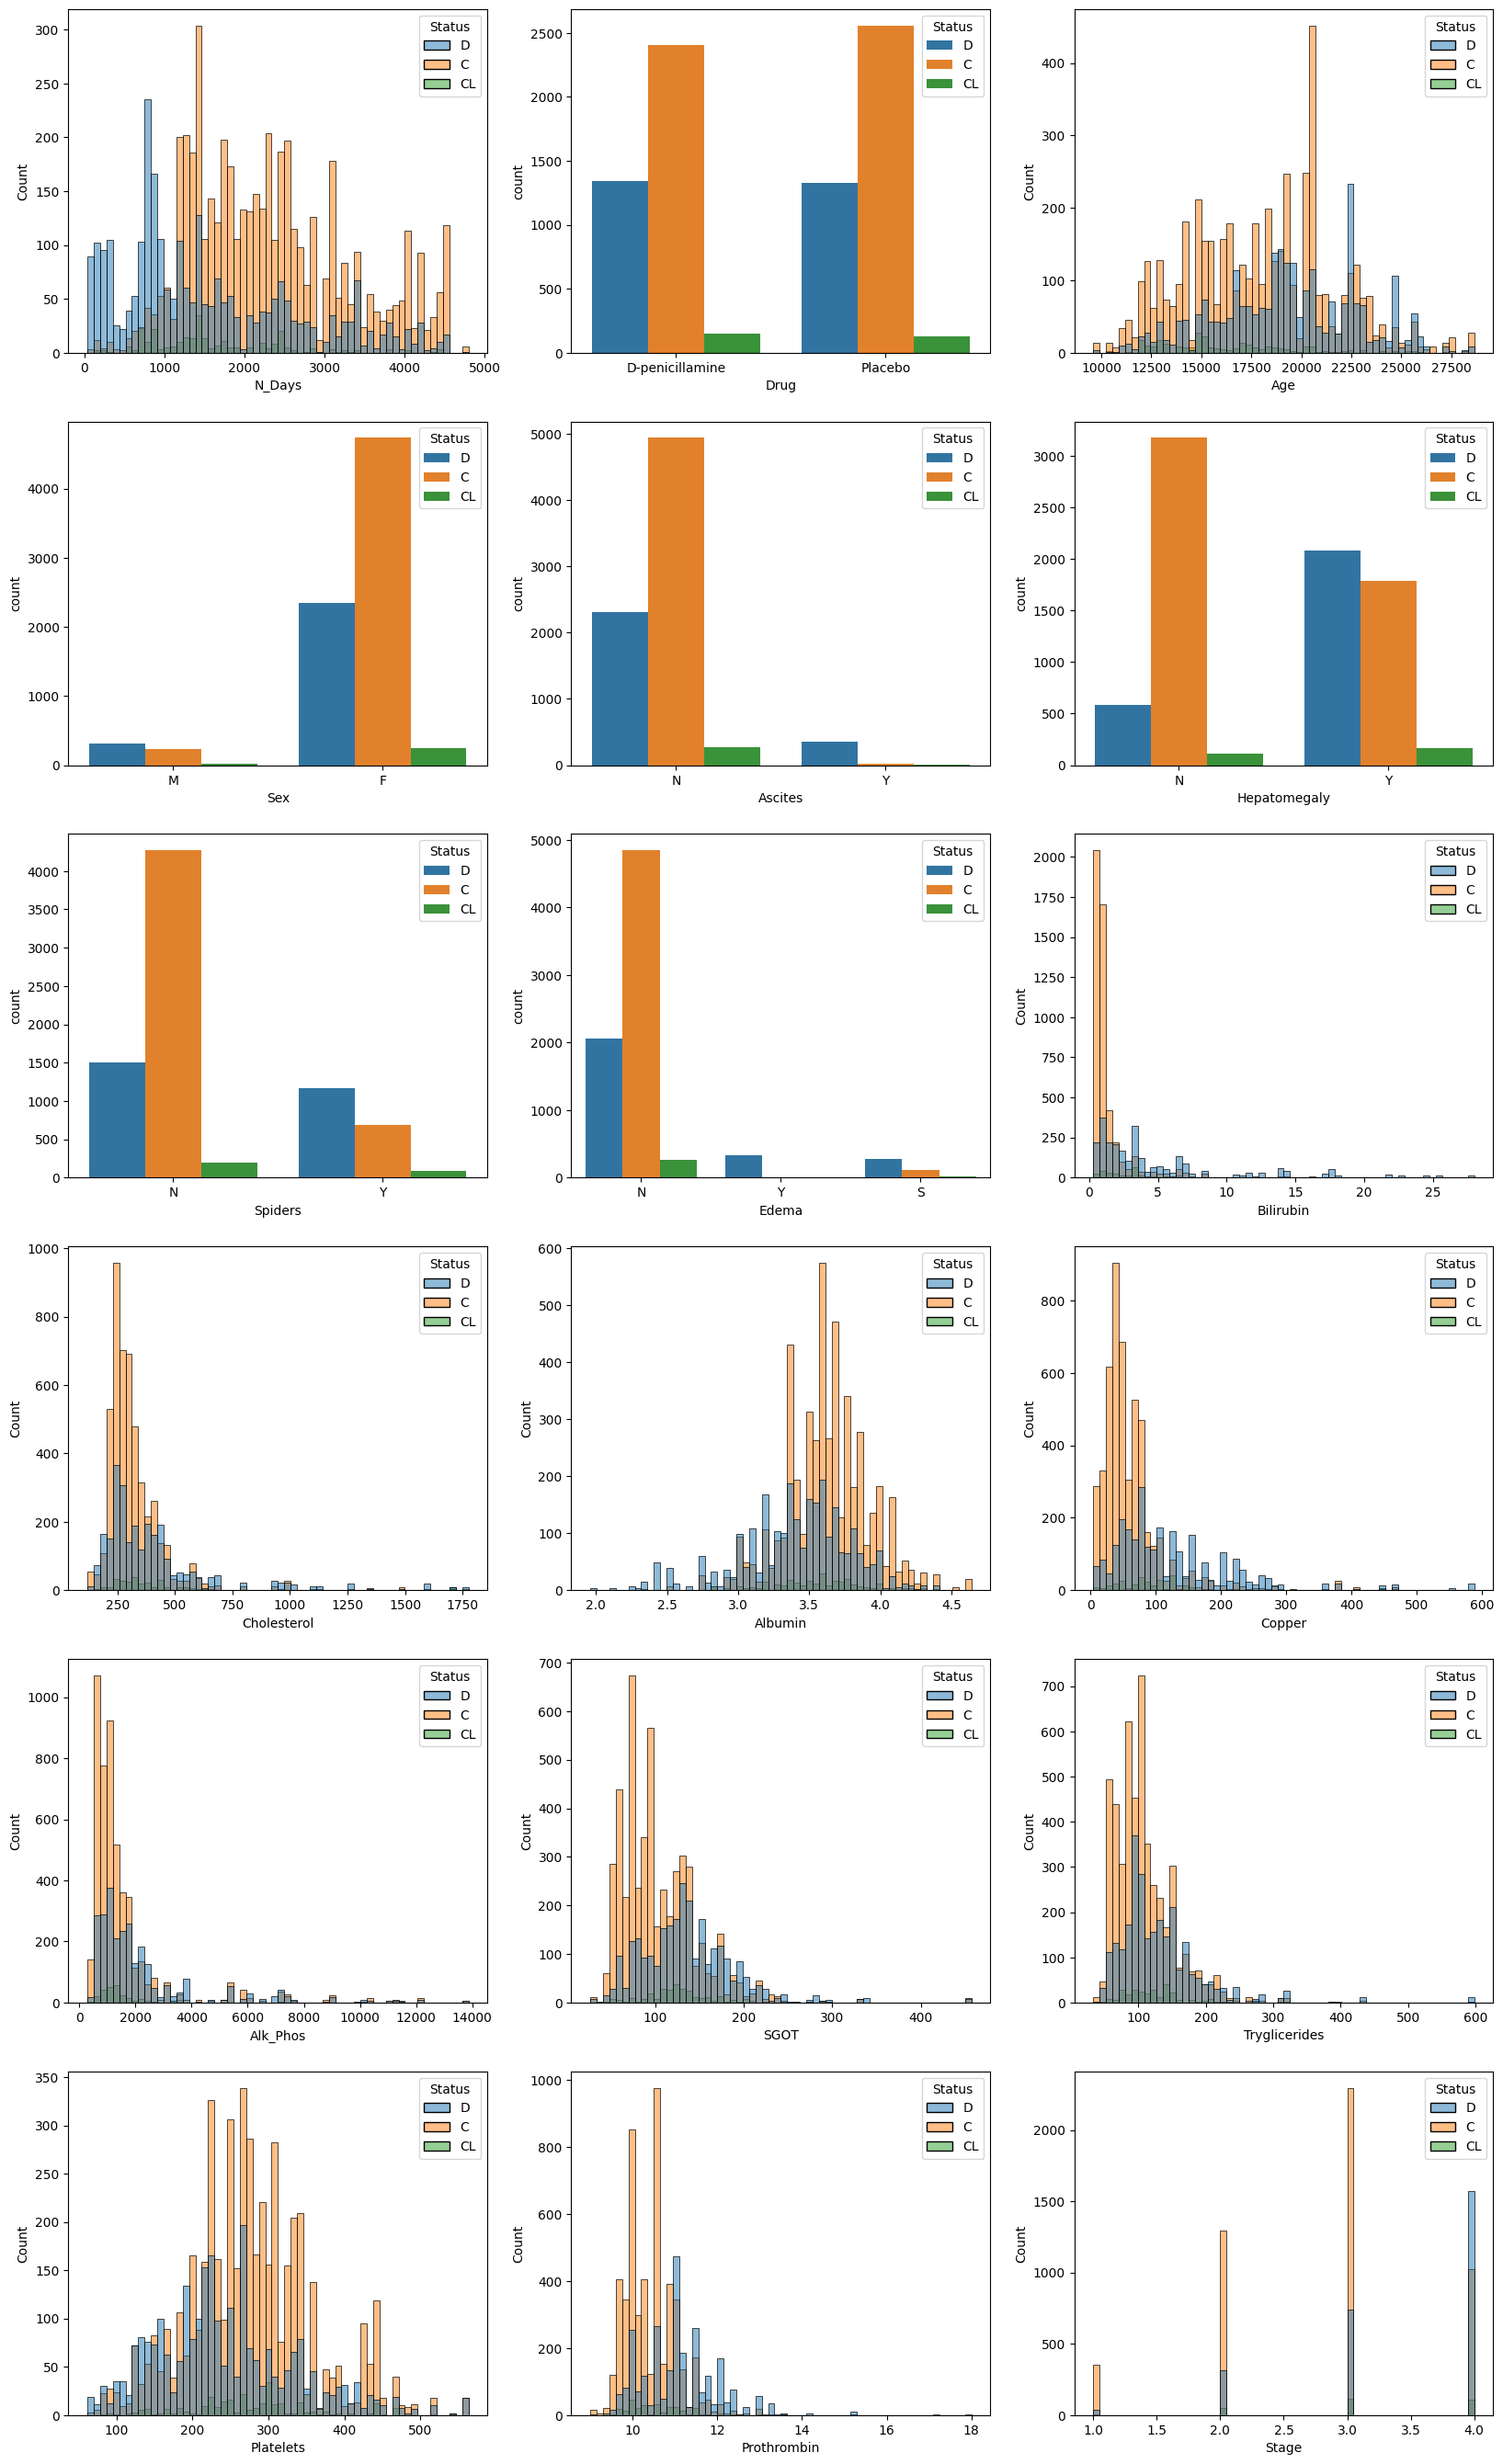

In [13]:
import seaborn as sns

i, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 34))
for feature, ax in zip(features, axes.ravel()):
    if train[feature].dtype == 'object':
        sns.countplot(data=train, x=feature, ax=ax, hue='Status')
    else:
        sns.histplot(data=train, x=feature, bins=60, ax=ax, hue='Status')
plt.show()

## Observations:

* **Skewed to the right**: Cholestrol, Copper, Alk_Phos, SGOT, Truglycerides, Prothrombin, Bilirubin
* **Normally Distributed**: N_Days, Age, Albumin, Platelets

Let us create some variables for helping ourselves

In [14]:
numerical_df = train.select_dtypes(exclude='object')
categorical_df = train.select_dtypes(exclude='number')

numerical_cols = numerical_df.columns.tolist()
categorical_cols = categorical_df.columns.tolist()
categorical_cols.append('Stage')
numerical_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

## Correlation Matrix

<Axes: >

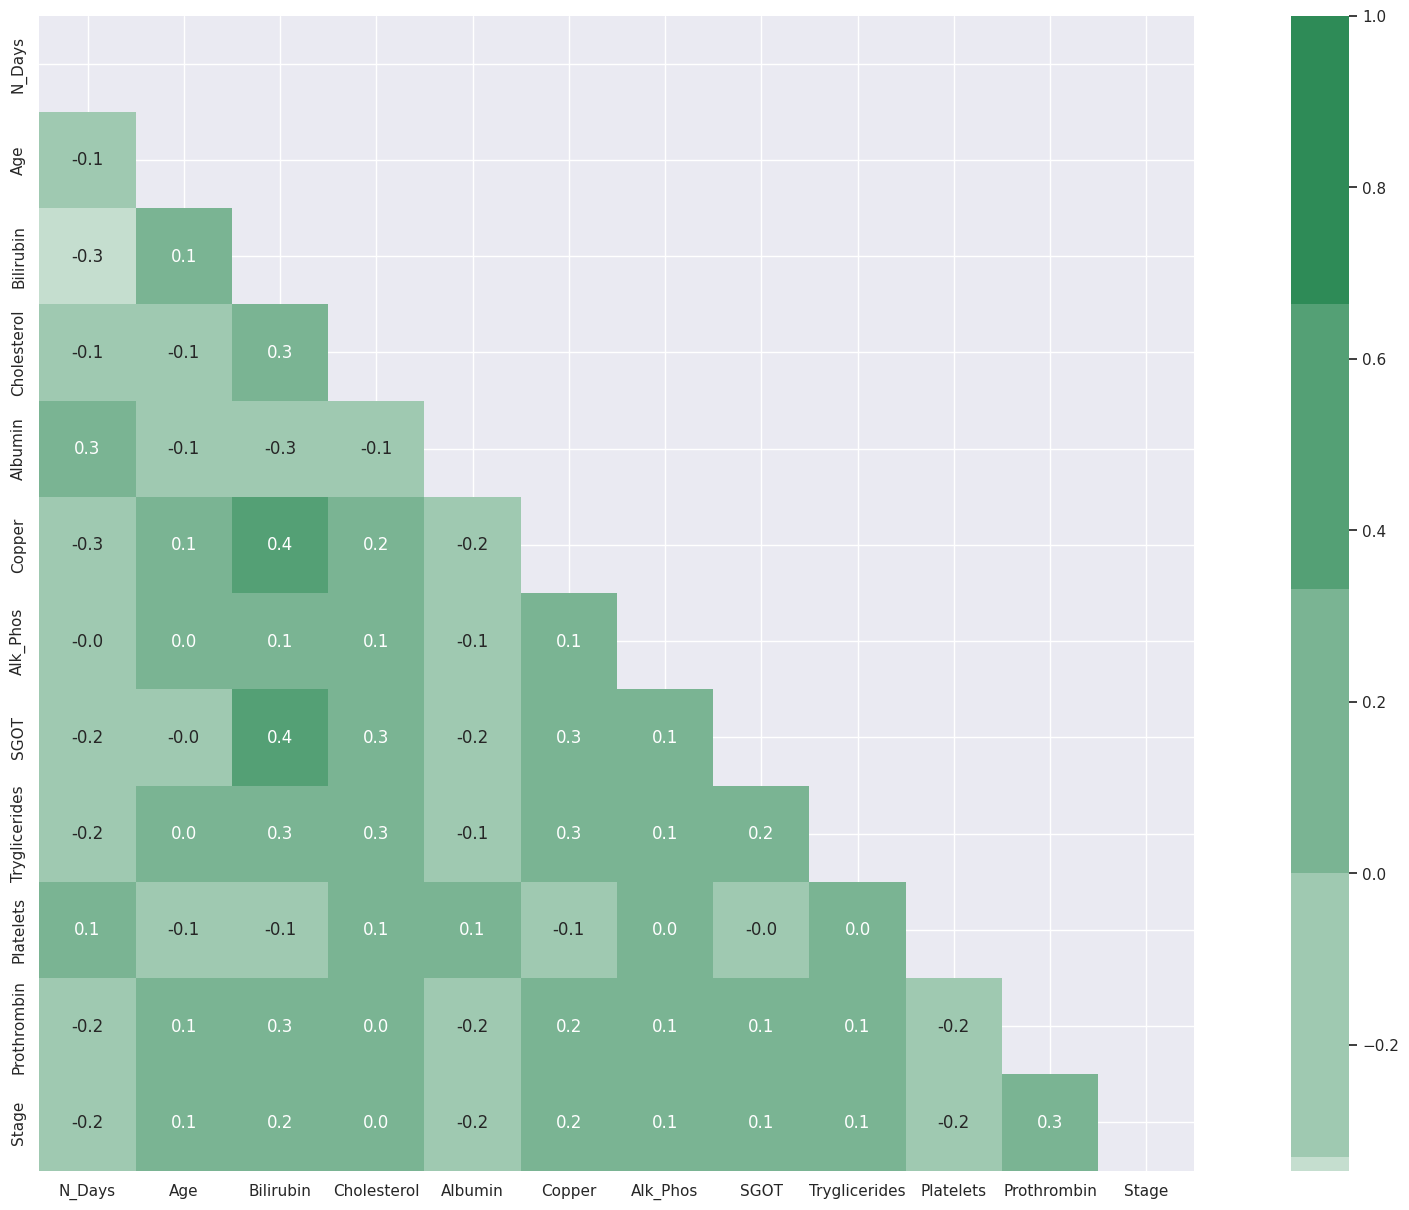

In [15]:
sns.set(rc={'figure.figsize':(25, 15)})

corr = numerical_df.corr()
mask = np.triu(np.ones_like(corr)).astype(bool)               
               
sns_cmap = sns.light_palette('seagreen')
               
sns.heatmap(corr, mask=mask, cmap=sns_cmap, fmt='.1f', square=True, center=0, vmax=1, annot=True)

Highest correlation is of 0.4 

## Box-plots

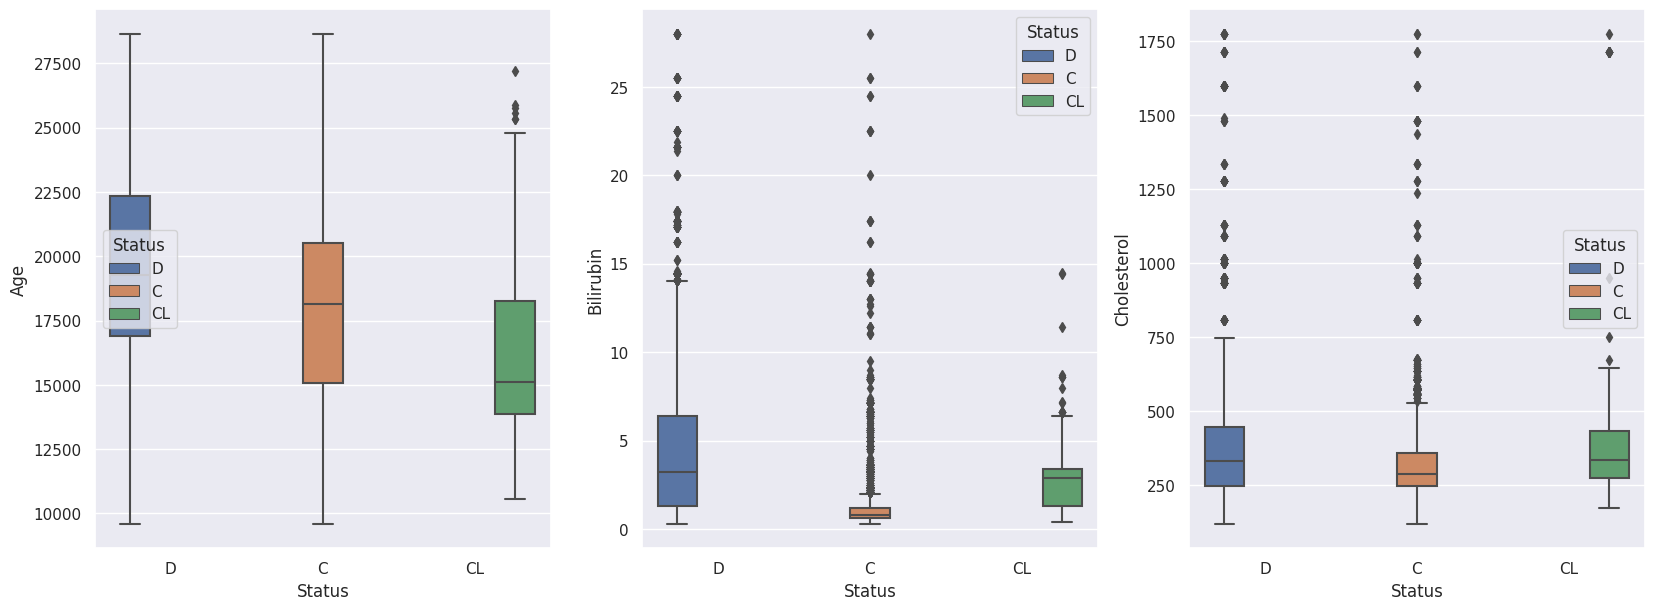

In [16]:
fig, axes = plt.subplots(1, 3, figsize = (20, 7))

for i, j in zip([0,1,2], ['Age', 'Bilirubin', 'Cholesterol']):
    sns.boxplot(ax = axes[i], data = train, x = 'Status', y = j, hue = 'Status')

Observations:

* There seems to be a **pattern between Status and Age**. As **age increases**, the **chances of death** (Status D) **increases**.
* The **C (Status of being alive)** is much **lesser** when the patient has **high amount of Bilirubin**.
* The **median amount of Cholestrol** seems to be the **same in each group**.

### Custom Color Palette

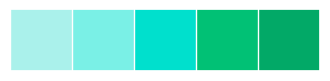

In [17]:
import matplotlib.colors as colors
import matplotlib.gridspec as grid_spec
from plotly.subplots import make_subplots
import plotly.graph_objects as go

custom_colors = ['#AAF1EB', '#7AF0E6', '#00E0CD', '#01C175', '#02A967']

custom_palette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors), size = 0.8)
plt.tick_params(axis='both', labelsize=0, length = 0)
custom_cmap = colors.LinearSegmentedColormap.from_list("custom", custom_colors)

In [18]:
train.describe().round(3).style.background_gradient(cmap=custom_cmap)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,2030.173000,18373.146000,2.594000,350.562000,3.548000,83.903000,1816.745000,114.605000,115.340000,265.229000,10.629000,3.033000
std,1094.234000,3679.959000,3.813000,195.379000,0.346000,75.899000,1903.751000,48.791000,52.530000,87.466000,0.782000,0.867000
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [19]:
train.select_dtypes(include=['object']).describe()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
count,7905,7905,7905,7905,7905,7905,7905
unique,2,2,2,2,2,3,3
top,Placebo,F,N,Y,N,N,C
freq,4010,7336,7525,4042,5966,7161,4965


## Pie-charts / Bar graphs

In [20]:
gender_labels = ['C', 'D', 'CL']
gender_values = train['Status'].value_counts().tolist()

fig = go.Figure()
fig = make_subplots(rows = 1, cols = 2, specs =[[{'type':'pie'}, {'type':'bar'}]],
                   horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels = gender_labels, values = gender_values, name ='Status Distribution',
                    marker_colors =['#7AF0E6', '#00E0CD', '#01C175'], hole = 0.5, showlegend=True),row = 1, col = 1)


groupby = train.groupby(['Sex','Status']).agg(count =('Status','count')).reset_index()


fig.add_trace(go.Bar(x = groupby[groupby.Status == "D"]['Sex'], y = groupby[groupby.Status == "D"]["count"], 
                     name = 'Status D',
    marker = dict(color='#00E0CD'), showlegend=False),row = 1, col = 2) 
fig.add_trace(go.Bar(x = groupby[groupby.Status == "C"]['Sex'], y = groupby[groupby.Status == "C"]["count"],
                     name = 'Status C',
    marker = dict(color ='#7AF0E6'), showlegend=False),row = 1, col = 2)
fig.add_trace(go.Bar(x = groupby[groupby.Status == "CL"]['Sex'], y = groupby[groupby.Status == "CL"]["count"],
                     name = 'Status CL',
    marker = dict(color ='#01C175'), showlegend=False),row = 1, col = 2)

# Update layout
fig.update_layout(height = 550, width = 900, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Gender</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.1, x1 = 0.48, y1 = 1.1)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.1, xanchor ="right", x = 1.2))
fig.show()

Observations:

* There is obviously more number of woman getting Cirrohis than men.

In [21]:
gender_labels_drug = ['N', 'Y']
gender_values_drug = train['Ascites'].value_counts().tolist()


fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels = gender_labels_drug, values = gender_values_drug, name='Ascites Distribution',
                     marker_colors=['#AAF1EB','#02A967'],hole=0.5),row=1, col=1)

groupby = train.groupby(['Ascites','Status']).agg(count =('Status','count')).reset_index()

fig.add_trace(go.Bar(x = groupby[groupby.Status == "D"]['Ascites'], y = groupby[groupby.Status == "D"]["count"], name = 'Status D',
    marker = dict(color='#00E0CD')),row=1, col=2) 
fig.add_trace(go.Bar(x = groupby[groupby.Status == "C"]['Ascites'], y = groupby[groupby.Status == "C"]["count"], name = 'Status C',
    marker = dict(color ='#7AF0E6')),row=1, col=2)
fig.add_trace(go.Bar(x = groupby[groupby.Status == "CL"]['Ascites'], y = groupby[groupby.Status == "CL"]["count"], name = 'Status CL',
    marker = dict(color ='#01C175')),row=1, col=2)
fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Ascites</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.14, x1 = 0.4, y1 = 1.14)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))
fig.show()

Observations:

* **Patients** often seem to **not have Ascites** (fluid accumulation in the abdominal cavity, a key clinical sign often associated with liver diseases).
* Those **patients** who **do have** seem to **not survive** (Status D) than survive.

In [22]:
gender_labels_drug = ['D-pencilillamine', 'Placebo']
gender_values_drug = train['Drug'].value_counts().tolist()


fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels=gender_labels_drug, values=gender_values_drug, name='Drug Distribution',
                     marker_colors=['#AAF1EB','#02A967'],hole=0.5),row=1, col=1)

groupby = train.groupby(['Drug','Status']).agg(count =('Status','count')).reset_index()

fig.add_trace(go.Bar(x = groupby[groupby.Status == "D"]['Drug'], y = groupby[groupby.Status == "D"]["count"], name = 'Status D',
    marker = dict(color='#00E0CD')),row=1, col=2) 
fig.add_trace(go.Bar(x = groupby[groupby.Status == "C"]['Drug'], y = groupby[groupby.Status == "C"]["count"], name = 'Status C',
    marker = dict(color ='#7AF0E6')),row=1, col=2)
fig.add_trace(go.Bar(x = groupby[groupby.Status == "CL"]['Drug'], y = groupby[groupby.Status == "CL"]["count"], name = 'Status CL',
    marker = dict(color ='#01C175')),row=1, col=2)
fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Drug</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.14, x1 = 0.4, y1 = 1.14)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))
fig.show()

Observations:

* **Patients consuming Placebo** seems to have a **very slight increase in Survival rate** (Status C) **in comparison to D-penicillamine consuming patients**.

In [23]:
gender_labels_drug = ['N', 'Y', 'S']
gender_values_drug = train['Status'].value_counts().tolist()


fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels=gender_labels_drug, values=gender_values_drug, name='Status Distribution',
                     marker_colors=['#AAF1EB','#02A967', '#26DDAB'],hole=0.5),row=1, col=1)

groupby = train.groupby(['Edema','Status']).agg(count =('Status','count')).reset_index()

fig.add_trace(go.Bar(x = groupby[groupby.Status == "D"]['Edema'], y = groupby[groupby.Status == "D"]["count"], name = 'Status D',
    marker = dict(color='#00E0CD')),row=1, col=2) 
fig.add_trace(go.Bar(x = groupby[groupby.Status == "C"]['Edema'], y = groupby[groupby.Status == "C"]["count"], name = 'Status C',
    marker = dict(color ='#7AF0E6')),row=1, col=2)
fig.add_trace(go.Bar(x = groupby[groupby.Status == "CL"]['Edema'], y = groupby[groupby.Status == "CL"]["count"], name = 'Status CL',
    marker = dict(color ='#01C175')),row=1, col=2)
fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Edema</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.14, x1 = 0.4, y1 = 1.14)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))
fig.show()

Observations:

* **Patients** are **more likely than not** to **not have Edema** (The abnormal accumulation of fluid, typically manifested as swelling, and often linked to liver-related complications.)
* **Patients** who **do have Edema**, seem to be **at a very high risk of dying** (Status D)

In [24]:
gender_labels_drug = ['N', 'Y']
gender_values_drug = train['Spiders'].value_counts().tolist()


fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels=gender_labels_drug, values=gender_values_drug, name='Spider Distribution',
                     marker_colors=['#AAF1EB','#02A967'],hole=0.5),row=1, col=1)

groupby = train.groupby(['Spiders','Status']).agg(count =('Status','count')).reset_index()

fig.add_trace(go.Bar(x = groupby[groupby.Status == "D"]['Spiders'], y = groupby[groupby.Status == "D"]["count"], name = 'Status D',
    marker = dict(color='#00E0CD')),row=1, col=2) 
fig.add_trace(go.Bar(x = groupby[groupby.Status == "C"]['Spiders'], y = groupby[groupby.Status == "C"]["count"], name = 'Status C',
    marker = dict(color ='#7AF0E6')),row=1, col=2)
fig.add_trace(go.Bar(x = groupby[groupby.Status == "CL"]['Spiders'], y = groupby[groupby.Status == "CL"]["count"], name = 'Status CL',
    marker = dict(color ='#01C175')),row=1, col=2)
fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Spiders</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.14, x1 = 0.4, y1 = 1.14)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))
fig.show()

Observations:

* **Patients** seems to **more often than not**, **not have Spiders** (The presence of spider angiomas or spider nevi, visible vascular lesions on the skin associated with liver disease).
* **Patients** who **do have Spiders**, seems to be **at a higher risk of dying** (Status D).

In [25]:
gender_labels_drug = ['N', 'Y']
gender_values_drug = train['Hepatomegaly'].value_counts().tolist()


fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels=gender_labels_drug, values=gender_values_drug, name='Hepatomegaly Distribution',
                     marker_colors=['#AAF1EB','#02A967'],hole=0.5),row=1, col=1)

groupby = train.groupby(['Hepatomegaly','Status']).agg(count =('Status','count')).reset_index()

fig.add_trace(go.Bar(x = groupby[groupby.Status == "D"]['Hepatomegaly'], y = groupby[groupby.Status == "D"]["count"], name = 'Status D',
    marker = dict(color='#00E0CD')),row=1, col=2) 
fig.add_trace(go.Bar(x = groupby[groupby.Status == "C"]['Hepatomegaly'], y = groupby[groupby.Status == "C"]["count"], name = 'Status C',
    marker = dict(color ='#7AF0E6')),row=1, col=2)
fig.add_trace(go.Bar(x = groupby[groupby.Status == "CL"]['Hepatomegaly'], y = groupby[groupby.Status == "CL"]["count"], name = 'Status CL',
    marker = dict(color ='#01C175')),row=1, col=2)
fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Hepatomegaly</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.14, x1 = 0.4, y1 = 1.14)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))
fig.show()

Observations: 

* The **spread of Hepatomegaly** (Enlargement of the liver, serving as an important clinical indicator of liver health.) seems to **be even**.
* However, **patients with Hepatomegal**y, have an **increased risk of dying** (Status D).

# Modelling

##### **Categorical and numerical features**:

But first, lets looks at the number of unique values in each of the categorical features:

In [26]:
for i in categorical_cols:
    print(f'The number of unique values in {i}: {train[i].nunique()}')

The number of unique values in Drug: 2
The number of unique values in Sex: 2
The number of unique values in Ascites: 2
The number of unique values in Hepatomegaly: 2
The number of unique values in Spiders: 2
The number of unique values in Edema: 3
The number of unique values in Status: 3
The number of unique values in Stage: 4


#### They all look **One-Hot-Encode-able**

> One-hot-encode the categorical features
> Standard Scale (Z-score Normalization) the numerical features

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_transformer = OneHotEncoder(sparse_output = False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

#### **Now we bundle them together!**

In [28]:
categorical_features = ['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Stage']
numerical_features = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper','Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)],
                                remainder='passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
                                  'Spiders', 'Edema', 'Stage']),
                                ('num', StandardScaler(),
                                 ['N_Days', 'Age', 'Bilirubin', 'Cholesterol',
                                  'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
                                  'Tryglicerides', 'Platelets',
                                  'Prothrombin'])])

**Now we will split the data into X and Y, to test predictions.**

In [29]:
X_train = train.drop(['Status'], axis=1)
y_train = train['Status']
X_train.head()
y_train = y_train.map({'C': 0, 'CL': 1, 'D': 2})
y_train.value_counts()

Status
0    4965
2    2665
1     275
Name: count, dtype: int64

# Getting accuracy values for multiple approaches

1. Cat Boost Classifier
2. Xtreme Gradient Boost Classifier
3. Random Forest Classifier
4. C-Support Vector Classifier
5. Logistic Regression
6. Light Gradient Boosting Machine Classifier

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import time

# Cat Boost Classifier Parameters
cbc_params = {'iterations': 700, 'depth': 4, 'learning_rate': 0.15, 'loss_function':'MultiClass', 
             'random_strength': 0.12, 'grow_policy': 'SymmetricTree', 'bootstrap_type': 'Bayesian',
             'od_type': 'Iter', 'od_wait': 48, 'max_bin': 238, 'l2_leaf_reg': 4.02, 'one_hot_max_size': 39,
             'random_state': 24, 'verbose': False}

# XGB Classifier Parameters
xgbc_params = {'max_depth': 10, 'n_estimators': 1000, 'objective': 'multi:softmax', 'learning_rate': 0.05,
              'min_child_weight': 9, 'colsample_bytree': 0.2, 'reg-alpha': 0.105, 'reg_lambda': 0.63,
              'eval_matric': ['mlogloss', 'merror'], 'random_state': 24, 'verbose': False}

# Random Forest Classifier Parameters
rfc_params = {'n_estimators': 1000, 'criterion': 'log_loss', 'max_depth': 6, 'min_samples_split': 4, 
             'min_samples_leaf': 3, 'max_leaf_nodes': 500, 'n_jobs': -1, 'random_state': 24, 'verbose': False}

# SVC Classifier Parameters
svc_params = {'C': 1.5, 'kernel': 'rbf', 'verbose': False, 'random_state': 24}

# Logistic Regression Parameters
lgr_params = {'max_iter': 200, 'multi_class': 'multinomial', 'n_jobs': -1, 'random_state': 24}

# LGBM Parameters 
lgbm_params = {'objective': 'multiclass', 'max_depth': 10, 'min_child_samples': 15, 'learning_rate': 0.035,
              'n_estimators': 1000, 'min_child_weight': 9, 'colsample_bytree': 0.17,'reg_alpha': 0.106,
              'reg_lambda': 0.62, 'random_state': 24}


models = [CatBoostClassifier(**cbc_params), XGBClassifier(**xgbc_params), RandomForestClassifier(**rfc_params), 
          SVC(**svc_params), LogisticRegression(**lgr_params), LGBMClassifier(**lgbm_params)]
model_name = ['Cat Boost Classifier', 'XGB Classifier', 'Random Forest Classifier', 
              'Support Vector Classification', 'Logistic Regression', 'LGBM Classifier']

for model, model_name in zip(models, model_name):
    pipeline_multi = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)]) 
    pipeline_multi.fit(X_train, y_train)
    print(f'{model_name}')
    start = time.time()
    for score in ["neg_log_loss", "accuracy"]:
        print(f'{score}: {cross_val_score(pipeline_multi, X_train, y_train, scoring=score, cv=5).mean()}')        
    print(f'{time.time() - start}\n')

Cat Boost Classifier
neg_log_loss: -0.4521459262936439
accuracy: 0.828842504743833
26.920316696166992

XGB Classifier
neg_log_loss: -0.484927871486666
accuracy: 0.8314990512333965
56.00653910636902

Random Forest Classifier
neg_log_loss: -0.4920493528060087
accuracy: 0.814168247944339
45.00655961036682

Support Vector Classification
neg_log_loss: nan
accuracy: 0.8098671726755219
17.808167934417725

Logistic Regression
neg_log_loss: -0.5251844478871772
accuracy: 0.7958254269449714
11.14854645729065

LGBM Classifier
neg_log_loss: -0.4614861584162682
accuracy: 0.831752055660974
169.97106766700745



### **Results**:

**We have a winner, in terms of accuracy:**
1. LGBM Classifier🥇
2. XGB Classifier🥈
3. Cat Boost Classifier🥉

**And in terms of loss minimization:**
1. Cat Boost Classifier🥇
2. LGBM Classifier🥈
3. XGB Classifier🥉

### **Lets first submit our predictions for LGBM Classifier**:

In [31]:
lgbm_model = LGBMClassifier(**lgbm_params)

pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', lgbm_model)])

In [33]:
pipeline_lgbm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Drug', 'Sex', 'Ascites',
                                                   'Hepatomegaly', 'Spiders',
                                                   'Edema', 'Stage']),
                                                 ('num', StandardScaler(),
                                                  ['N_Days', 'Age', 'Bilirubin',
                                                   'Cholesterol', 'Albumin',
                                                   'Copper', 'Alk_Phos', 'SGOT',
                                                   'Tryglicerides', 'Platelets',
                                                   'Prothrombin'])])),
                ('model',
                 LGBMClassifier(colsample_bytree=0.17, learning_rate=0.035,
                                max_depth=10, min_child_samples=15,
                                min_child_weight=9, n_estimators=1000,
                                objective='multiclass', random_state=24,
                                reg_alpha=0.106, reg_lambda=0.62))])

In [38]:
lgbm_preds = pipeline_lgbm.predict_proba(test)

In [35]:
submission_lgbm = samp_sub.copy()

In [37]:
samp_sub.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128
3,7908,0.628084,0.034788,0.337128
4,7909,0.628084,0.034788,0.337128


In [39]:
submission_lgbm['Status_C'] = lgbm_preds[:, 0]
submission_lgbm['Status_CL'] = lgbm_preds[:, 1]
submission_lgbm['Status_D'] = lgbm_preds[:, 2]

In [41]:
submission_lgbm.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.186549,0.020221,0.793230
1,7906,0.329879,0.338990,0.331131
2,7907,0.008908,0.004356,0.986736
3,7908,0.980178,0.002732,0.017090
4,7909,0.911594,0.050145,0.038261


In [42]:
submission_lgbm.to_csv('submission_lgbm.csv', index=False)

## LGBM Classifier Results

* **Score:** 0.42015
* **Rank:** 254

We did well enough for our first submission!